In [37]:
import pandas as pd
import tsfresh as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [38]:
base_directory = 'C:/Users/DELL/Desktop/Coding/Andreas/Datasets/human+activity+recognition+using+smartphones/'
X_train_file = os.path.join(base_directory, 'UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt')
X_test_file = os.path.join(base_directory, 'UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt')
y_train_file = os.path.join(base_directory, 'UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt')
y_test_file = os.path.join(base_directory, 'UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt')
features_file = os.path.join(base_directory, 'UCI HAR Dataset/UCI HAR Dataset/features.txt')
activity_labels_file = os.path.join(base_directory, 'UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt')

df_y_test = pd.read_csv(y_test_file, header=None, sep='\s+')
df_test = pd.read_csv(X_test_file, header=None, sep='\s+')
df = pd.read_csv(X_train_file, header=None, sep='\s+')
df_y = pd.read_csv(y_train_file, header=None, sep='\s+')
with open(features_file, 'r') as f:
    features = f.read().splitlines()

df.columns = [x.split(' ')[1] for x in features]
df_test.columns = [x.split(' ')[1] for x in features]
activity_labels = pd.read_csv(activity_labels_file, sep=' ', header=None, index_col=0)
y_train_not_main = df_y.map(lambda x: activity_labels.iloc[x-1][1])
y_test_not_main = df_y_test.map(lambda x: activity_labels.iloc[x-1][1])

df['Activity'] = y_train_not_main
df_test['Activity'] = y_test_not_main
df['window_idx'] = (df['Activity'] != df['Activity'].shift()).cumsum().map(lambda x: 'ac'+'{:04d}'.format(x))
df_test['window_idx'] = (df_test['Activity'] != df_test['Activity'].shift()).cumsum().map(lambda x: 'ac'+'{:04d}'.format(x))
df['Activity_idx'] = (df['Activity'] != df['Activity'].shift()).cumsum().map(lambda x: f'{df.iloc[x].Activity} '+'{:04d}'.format(x))
df_test['Activity_idx'] = (df_test['Activity'] != df_test['Activity'].shift()).cumsum().map(lambda x: f'{df_test.iloc[x].Activity} '+'{:04d}'.format(x))
df['idx'] = df.reset_index().index
df_test['idx'] = df_test.reset_index().index

df_time = df.iloc[:, list(range(1, 265)) + [-3,-1]]
df_time_test = df_test.iloc[:, list(range(1, 265)) + [-3,-1]]

In [39]:
df_time.head()

,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,...,tBodyGyroJerkMag-sma(),tBodyGyroJerkMag-energy(),tBodyGyroJerkMag-iqr(),tBodyGyroJerkMag-entropy(),tBodyGyroJerkMag-arCoeff()1,tBodyGyroJerkMag-arCoeff()2,tBodyGyroJerkMag-arCoeff()3,tBodyGyroJerkMag-arCoeff()4,window_idx,idx
0,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,-0.994248,-0.999949,-0.994547,-0.619768,0.292840,-0.176889,-0.145779,-0.124072,ac0001,0
1,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,...,-0.995123,-0.999970,-0.994819,-0.730722,0.209334,-0.178113,-0.103084,-0.043824,ac0001,1
2,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,...,-0.993403,-0.999955,-0.993988,-0.662914,0.328031,-0.154560,-0.220587,-0.107514,ac0001,2
3,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,...,-0.995502,-0.999970,-0.995001,-0.683016,0.595371,-0.264569,-0.315723,-0.163826,ac0001,3
4,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,...,-0.995808,-0.999972,-0.996484,-0.720171,0.331858,-0.260562,-0.145665,-0.007368,ac0001,4


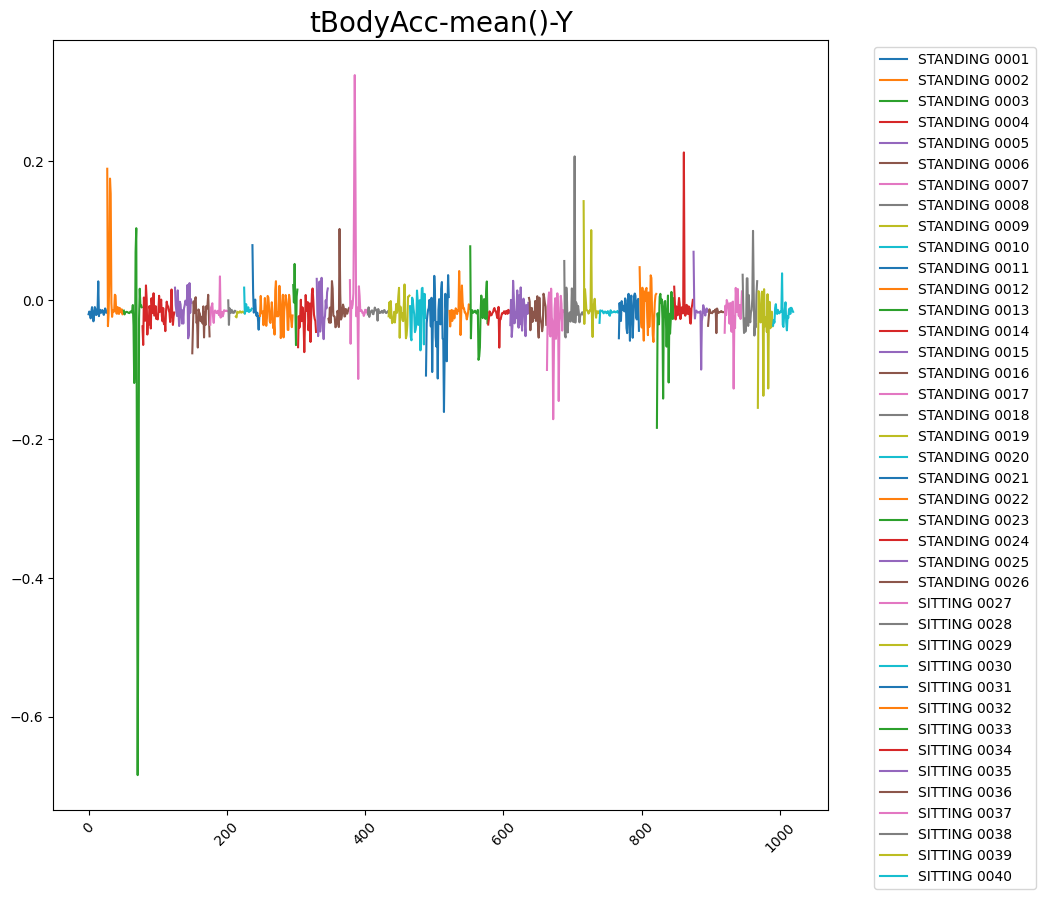

In [5]:
def plot_first_ten(df, style='-'):
    k = 1
    plt.figure(figsize=[10,10])
    for i,idx in enumerate(np.unique(df['window_idx'])[:40]):
        plt.plot(df[df.columns[k]][df.window_idx == idx], style, label=df[df.columns[-2]][df.window_idx == idx].iloc[0])
        plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(df.columns[k], fontsize= 20)
    plt.show()


plot_first_ten(df)

In [6]:
import tsfresh
from tsfresh.feature_extraction import settings
from tsfresh.feature_extraction.settings import MinimalFCParameters
from tsfresh.feature_extraction import extract_features
from tsfresh.transformers import FeatureSelector
from tsfresh.feature_extraction.settings import EfficientFCParameters

print(f'{tsfresh.__version__ = }')
minimal_fc = MinimalFCParameters()
select = FeatureSelector()

efficient_fc = EfficientFCParameters()  # Create dictionary
efficient = sorted(efficient_fc.keys())  # Sort list of dictionary keys

tsfresh.__version__ = '0.20.2'


In [7]:
X = extract_features(df_time, column_id='window_idx', column_sort='idx',
                    default_fc_parameters=minimal_fc)
X_test = extract_features(df_time_test, column_id='window_idx', column_sort='idx',
                    default_fc_parameters=minimal_fc)
X.head()

Feature Extraction: 100%|██████████| 40/40 [00:04<00:00,  8.04it/s]


,tBodyAcc-mean()-Y__sum_values,tBodyAcc-mean()-Y__median,tBodyAcc-mean()-Y__mean,tBodyAcc-mean()-Y__length,tBodyAcc-mean()-Y__standard_deviation,tBodyAcc-mean()-Y__variance,tBodyAcc-mean()-Y__root_mean_square,tBodyAcc-mean()-Y__maximum,tBodyAcc-mean()-Y__absolute_maximum,tBodyAcc-mean()-Y__minimum,...,tBodyGyroJerkMag-arCoeff()4__sum_values,tBodyGyroJerkMag-arCoeff()4__median,tBodyGyroJerkMag-arCoeff()4__mean,tBodyGyroJerkMag-arCoeff()4__length,tBodyGyroJerkMag-arCoeff()4__standard_deviation,tBodyGyroJerkMag-arCoeff()4__variance,tBodyGyroJerkMag-arCoeff()4__root_mean_square,tBodyGyroJerkMag-arCoeff()4__maximum,tBodyGyroJerkMag-arCoeff()4__absolute_maximum,tBodyGyroJerkMag-arCoeff()4__minimum
ac0001,-0.435746,-0.017714,-0.016139,27.0,0.009626,0.000093,0.018792,0.027094,0.030488,-0.030488,...,-7.701034,-0.325851,-0.285223,27.0,0.178783,0.031963,0.336624,0.151146,0.600367,-0.600367
ac0002,0.251600,-0.016156,0.010483,24.0,0.062876,0.003953,0.063744,0.189263,0.189263,-0.037455,...,1.506417,0.056723,0.062767,24.0,0.184849,0.034169,0.195215,0.357147,0.414521,-0.414521
ac0003,-1.718361,-0.017645,-0.063643,27.0,0.154877,0.023987,0.167444,0.103648,0.684097,-0.684097,...,-5.447505,-0.160055,-0.201759,27.0,0.203603,0.041454,0.286638,0.139815,0.552994,-0.552994
ac0004,-0.842737,-0.017797,-0.017931,47.0,0.016726,0.000280,0.024521,0.021219,0.064550,-0.064550,...,-13.107229,-0.293823,-0.278877,47.0,0.112526,0.012662,0.300723,-0.053579,0.464228,-0.464228
ac0005,-0.288612,-0.007522,-0.011544,25.0,0.019891,0.000396,0.022998,0.024560,0.054997,-0.054997,...,1.809317,0.022386,0.072373,25.0,0.179663,0.032279,0.193692,0.405706,0.405706,-0.195714


In [8]:
y_train = df.iloc[:,[-3,-4]].groupby('window_idx').first()['Activity']
y_test = df_test.iloc[:,[-3,-4]].groupby('window_idx').first()['Activity']
y_test.shape

(120,)

In [9]:
select.fit(X, y_train)

FeatureSelector()

In [10]:
len(select.relevant_features)

2581

## LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [12]:
logreg = LogisticRegression()
logreg.fit(X.iloc[:,[1,2,3]], y_train)

c:\Users\DELL\Desktop\Coding\Andreas\andreas-venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score, accuracy_score

pca_errs = [0.99, 0.995, 0.999, 0.9995, 0.9999]
mcc_vals = [-1 for _ in pca_errs]
auc_vals = [-1 for _ in pca_errs]

print('-'*15, f'RANDOM FOREST RESULTS', '-'*15)

for i,pca_err in enumerate(pca_errs):

    print('-'*10, f'PCA Error: {1-pca_err}', '-'*10)

    # Sample Data (Replace these with your actual data)
    # x_train = pd.DataFrame(np.random.rand(280, 2581))
    # y_train = pd.Series(np.random.randint(0, 2, 280))
    # x_test = pd.DataFrame(np.random.rand(100, 2581))  # Example test set
    x_test = X_test

    # Standardize the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(X)
    x_test_scaled = scaler.transform(x_test)

    # Apply PCA
    pca = PCA(n_components=pca_err)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    print(f'Original shape: {X.shape}')
    print(f'Transformed shape: {x_train_pca.shape}')

    # Initialize the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(x_train_pca, y_train)

    # Predict on x_test
    y_test_pred = model.predict(x_test_pca)
    y_pred_proba = model.predict_proba(x_test_pca)

    # If you have a y_test for evaluation
    # y_test = pd.Series(np.random.randint(0, 2, 100))  # Example test labels
    Accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{Accuracy = }')

    # Compute and print Matthews correlation coefficient
    mcc = matthews_corrcoef(y_test, y_test_pred)
    mcc_vals[i] = mcc
    print(f'Matthews Correlation Coefficient: {mcc}')

    # Compute and print Area Under the Curve (AUC)
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    auc_vals[i] = auc
    print(f'Area Under the Curve (AUC): {auc}')
    print()



--------------- RANDOM FOREST RESULTS ---------------
---------- PCA Error: 0.010000000000000009 ----------
Original shape: (280, 2640)
Transformed shape: (280, 184)
Accuracy = 0.9333333333333333
Matthews Correlation Coefficient: 0.9197087563656537
Area Under the Curve (AUC): 0.9964810980031009

---------- PCA Error: 0.0050000000000000044 ----------
Original shape: (280, 2640)
Transformed shape: (280, 215)
Accuracy = 0.9416666666666667
Matthews Correlation Coefficient: 0.9297556430988243
Area Under the Curve (AUC): 0.9950024052824163

---------- PCA Error: 0.0010000000000000009 ----------
Original shape: (280, 2640)
Transformed shape: (280, 259)
Accuracy = 0.9
Matthews Correlation Coefficient: 0.8811020520390589
Area Under the Curve (AUC): 0.9917240246999585

---------- PCA Error: 0.0004999999999999449 ----------
Original shape: (280, 2640)
Transformed shape: (280, 268)
Accuracy = 0.9583333333333334
Matthews Correlation Coefficient: 0.9502556924009409
Area Under the Curve (AUC): 0.9964

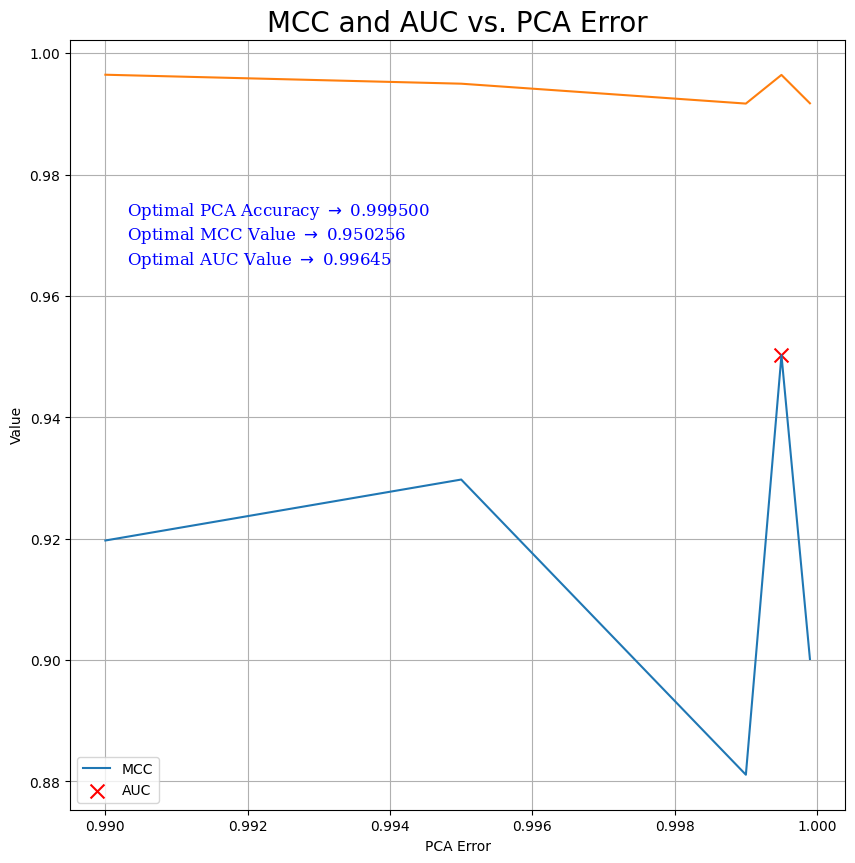

In [33]:
d  = 0.004
plt.figure(figsize=(10,10))
plt.plot(pca_errs, mcc_vals)
plt.scatter(pca_errs[np.argmax(mcc_vals)], max(mcc_vals), color='red',marker='x',s=100)
plt.plot(pca_errs, auc_vals)
plt.legend(['MCC', 'AUC'])
plt.xlabel('PCA Error')
plt.ylabel('Value')
plt.grid()
plt.title('MCC and AUC vs. PCA Error',fontsize=20)
plt.text(0.9903, 0.97+d, r'Optimal PCA Accuracy $\rightarrow$ {:3f}'.format(pca_errs[np.argmax(mcc_vals)]), fontdict={'size': 12, 'color': 'blue', 'font': 'serif'}, verticalalignment='center')
plt.text(0.9903, 0.97, r'Optimal MCC Value $\rightarrow$ {:5f}'.format(mcc_vals[np.argmax(mcc_vals)]), fontdict={'size': 12, 'color': 'blue', 'font': 'serif'}, verticalalignment='center')
plt.text(0.9903, 0.97-d, r'Optimal AUC Value $\rightarrow$ {:.5f}'.format(auc_vals[np.argmax(mcc_vals)]), fontdict={'size': 12, 'color': 'blue', 'font': 'serif'}, verticalalignment='center')
plt.show()

In [36]:
arr = [1,2,3,4,5]
def pop(q):
    print(q)
    return
arr.pop()
arr

[1, 2, 3, 4]